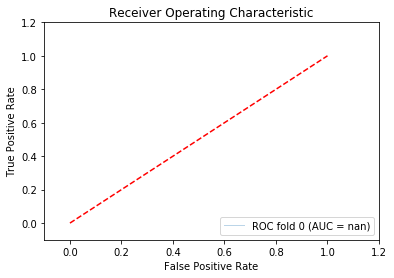

In [83]:
# FUNCTION TO CALCULATE SENSITIVITY , SPECIFICITY , ACCURACY , F_SCORE AND AREA UNDER CURVE VALUES OF EACH PARTICLE IN THE POPULATION


import random
from math import *
import numpy as np
from scipy import interp
import copy
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import StratifiedKFold


if __name__=='__main__':
#def values(POPULATION_SIZE,NONDOM_PARTICLE,temp_nondom,VALUES_1):
    POPULATION_SIZE=2
    NONDOM_PARTICLE=[0]
    temp_nondom=1
    VALUES_1=[[float(0.0) for j in range(5)] for i in range(temp_nondom)]
    temp=1
    no_of_pathways=0
    NO_OF_GENES = []
    arr1=[]
    GENES_IN_PARTICLE=0
    with open("/home/sukanya/Desktop/PSO_and_MOPSO/PSO1/datasets/pathway/child_path(copy).txt") as br:
        for line in br:
            if(line.startswith("KEGG")):
                no_of_pathways+=1
       
    GENES=[[] for j in range(no_of_pathways)]
    i=0
                
    with open("/home/sukanya/Desktop/PSO_and_MOPSO/PSO1/datasets/pathway/child_path(copy).txt") as br:
        for line in br:
            if(line.startswith("KEGG")):
                arr1=line.split('\t')
                GENES[i]=arr1[5].split(", ")
                NO_OF_GENES.append(len(GENES[i]))
                GENES_IN_PARTICLE+=len(GENES[i])
                i+=1
    ALL_GENES=[]
    Total=0
    VALUES=[]
    tempSENSITIVITY=[float(0.0) for i in range(GENES_IN_PARTICLE)]
    tempSPECIFICITY=[float(0.0) for i in range(GENES_IN_PARTICLE)]
    accuracy=[float(0.0) for i in range(GENES_IN_PARTICLE)]
    f_score=[float(0.0) for i in range(GENES_IN_PARTICLE)]
    SENSITIVITY=[float(0.0) for i in range(POPULATION_SIZE)]
    SPECIFICITY=[float(0.0) for i in range(POPULATION_SIZE)]
    g=0
    with open("/home/sukanya/Desktop/PSO_and_MOPSO/PSO1/datasets/child.txt") as sn:
        for line in sn:
            if(line.startswith("class")):
                ALL_GENES=line.split("\t")
    tp=0.0
    tn=0.0
    fp=0.0
    fn=0.0
    tp_rate=[int(0) for i in range(GENES_IN_PARTICLE)]
    fp_rate=[float(0.0) for i in range(GENES_IN_PARTICLE)]
    
    for i in range(no_of_pathways):
        for j in range(int(NO_OF_GENES[i])):
            for k in range(len(ALL_GENES)):
                if(GENES[i][j].lower()==ALL_GENES[k]):
                    with open("/home/sukanya/Desktop/PSO_and_MOPSO/PSO1/datasets/child.txt") as am:
                        for line in am:
                            if(line.startswith("normal")):
                                VALUES=line.split("\t")
                                if(VALUES[k]==str(0)):
                                    tn+=1.0
                                elif(VALUES[k]>str(0) and VALUES[k]<str(0.5)):
                                    fn+=1.0
                            elif(line.startswith("tumor")):
                                VALUES=line.split("\t")
                                if(VALUES[k]==str(1)):
                                    tp+=1.0
                                elif(VALUES[k]>str(0.5) and VALUES[k]<str(1.0)):
                                    fp+=1.0             
                    tempSENSITIVITY[g]=(tp/(tp+fn))
                    tempSPECIFICITY[g]=(tn/(tn+fp))
                    accuracy[g]=(tp+tn)/(tp+tn+fp+fn)
                    f_score[g]=(2*tp)/((2*tp)+fp+fn)
                    tp=0.0
                    tn=0.0
                    fp=0.0
                    fn=0.0
            g+=1
    
    
    for i in range(0,GENES_IN_PARTICLE/2-1):
        tp_rate[i]=int(tempSENSITIVITY[i])
    for i in range(GENES_IN_PARTICLE/2,GENES_IN_PARTICLE-1):
        tp_rate[i]=int(tempSPECIFICITY[i])
    for i in range(0,GENES_IN_PARTICLE/2-1):
        fp_rate[i]=(1-tempSPECIFICITY[i])
    for i in range(GENES_IN_PARTICLE/2,GENES_IN_PARTICLE-1):
        fp_rate[i]=(tempSPECIFICITY[i])
        
    Weighted_Score1=[float(0.0) for i in range(POPULATION_SIZE)]
    Weighted_Score2=[float(0.0) for i in range(POPULATION_SIZE)]
    Weighted_Score3=[float(0.0) for i in range(POPULATION_SIZE)]
    Weighted_Score4=[float(0.0) for i in range(POPULATION_SIZE)]
    
    SENSITIVITY_SCORE=[float(0.0) for i in range(POPULATION_SIZE)]
    ACCURACY_SCORE=[float(0.0) for i in range(POPULATION_SIZE)]
    F_SCORE=[float(0.0) for i in range(POPULATION_SIZE)]
    
    MSENSITIVITY_SCORE=[int(1) for  i in range(POPULATION_SIZE)]
    # calculation of sensitivity of each particle in the population
    
    for  i in range(POPULATION_SIZE):
        for j in range(len(NO_OF_GENES)):
            ran1=random.random()
            SENSITIVITY_SCORE[i]+=(float(tempSENSITIVITY[j]*ran1))
            Weighted_Score1[i]+=ran1
            SENSITIVITY_SCORE[i]=(float(SENSITIVITY_SCORE[i])/float(Weighted_Score1[i]))
            MSENSITIVITY_SCORE[i]=MSENSITIVITY_SCORE[i]-SENSITIVITY_SCORE[i]
    SPECIFICITY_SCORE=[float(0.0) for i in range(POPULATION_SIZE)]
    MSPECIFICITY_SCORE=[int(1) for i in range(POPULATION_SIZE)]
    # calculation of specificity of each particle in the population
    
    for i in range(POPULATION_SIZE):
        for j in range(len(NO_OF_GENES)):
            ran2=random.random()
            SPECIFICITY_SCORE[i]+=(float(tempSPECIFICITY[j]*ran2))
            Weighted_Score2[i]+=ran2
            SPECIFICITY_SCORE[i]=(float(SPECIFICITY_SCORE[i])/float(Weighted_Score2[i]))
            MSPECIFICITY_SCORE[i]=MSPECIFICITY_SCORE[i]-SENSITIVITY_SCORE[i]
   
    MACCURACY_SCORE=[int(1) for i in range(POPULATION_SIZE)]
    
    # calculation of accuracy score of each particle in the population
    for i in range(POPULATION_SIZE):
        for j in range(len(NO_OF_GENES)):
            ran3=random.random()
            ACCURACY_SCORE[i]+=(float(accuracy[j]*ran3))
            Weighted_Score3[i]+=ran3
            ACCURACY_SCORE[i]=(float(ACCURACY_SCORE[i])/float(Weighted_Score3[i]))
            MACCURACY_SCORE[i]=MACCURACY_SCORE[i]-ACCURACY_SCORE[i]

    MF_SCORE=[int(1) for i in range(POPULATION_SIZE)]
    
    # calculation of f score of each particle in the population
    for i in range(POPULATION_SIZE):
        for j in range(len(NO_OF_GENES)):
            ran4=random.random()
            F_SCORE[i]+=(float(f_score[j]*ran4))
            Weighted_Score4[i]+=ran4
            F_SCORE[i]=(float(F_SCORE[i])/float(Weighted_Score4[i]))
            MF_SCORE[i]=MF_SCORE[i]-F_SCORE[i]

    AREA_CURVE=[float(0.0) for i in range(POPULATION_SIZE)]
    MAREA_CURVE=[int(1) for i in range(POPULATION_SIZE)]
    
    # calculation of area under curve values of each particle in the population
    for i in range(POPULATION_SIZE):
        AREA_CURVE[i]=(SENSITIVITY_SCORE[i]/MSPECIFICITY_SCORE[i])
        MAREA_CURVE[i]=(MAREA_CURVE[i]-AREA_CURVE[i])
     
    for i in range(temp_nondom):
        VALUES_1[i][0]+=(MSENSITIVITY_SCORE[int(NONDOM_PARTICLE[i])])
        VALUES_1[i][1]+=(MSPECIFICITY_SCORE[int(NONDOM_PARTICLE[i])])
        VALUES_1[i][2]+=(MACCURACY_SCORE[int(NONDOM_PARTICLE[i])])
        VALUES_1[i][3]+=(MF_SCORE[int(NONDOM_PARTICLE[i])])
        VALUES_1[i][4]+=(MAREA_CURVE[int(NONDOM_PARTICLE[i])])
    
    
    #plot of roc and auc curve
    false_positive_rate, true_positive_rate, thresholds = roc_curve(tp_rate,fp_rate)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
   
        
    
